In [2]:
pip install missingno

Note: you may need to restart the kernel to use updated packages.


In [3]:
import missingno

import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline


In [4]:
# -*- coding: utf-8 -*-

# 라이브러리 불러오기
import pandas as pd
import numpy as np

# read_csv() 함수로 df 생성
df = pd.read_csv('./auto-mpg.csv', header=None)

# 열 이름을 지정
df.columns = ['mpg','cylinders','displacement','horsepower','weight',
              'acceleration','model year','origin','name'] 

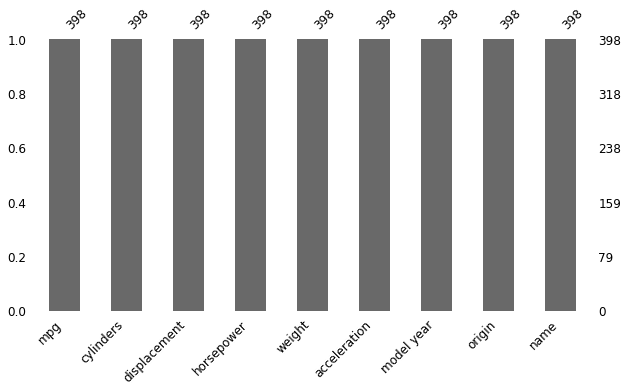

In [6]:
missingno.bar(df, figsize=(10,5), fontsize=12);

In [ ]:
# horsepower 열의 누락 데이터('?') 삭제하고 실수형으로 변환
df['horsepower'].replace('?', np.nan, inplace=True)      # '?'을 np.nan으로 변경
df.dropna(subset=['horsepower'], axis=0, inplace=True)   # 누락데이터 행을 삭제
df['horsepower'] = df['horsepower'].astype('float')      # 문자열을 실수형으로 변환

# np.histogram 으로 3개의 bin으로 나누는 경계 값의 리스트 구하기
count, bin_dividers = np.histogram(df['horsepower'], bins=3)

# 3개의 bin에 이름 지정
bin_names = ['저출력', '보통출력', '고출력']

# pd.cut 으로 각 데이터를 3개의 bin에 할당
df['hp_bin'] = pd.cut(x=df['horsepower'],     # 데이터 배열
                      bins=bin_dividers,      # 경계 값 리스트
                      labels=bin_names,       # bin 이름
                      include_lowest=True)    # 첫 경계값 포함

# hp_bin 열의 범주형 데이터를 더미 변수로 변환
horsepower_dummies = pd.get_dummies(df['hp_bin'])
print(horsepower_dummies.head(15))

In [7]:
import pandas as pd

#날짜 형식의 문자열로 구성되는 리스트 정의
dates = ['2019-01-01', '2020-03-01', '2021-06-01']

#문자열 데이터(시리즈 객체)를 판다스 Timestamp로 변환
ts_dates = pd.to_datetime(dates)
print(ts_dates)

DatetimeIndex(['2019-01-01', '2020-03-01', '2021-06-01'], dtype='datetime64[ns]', freq=None)


In [10]:
#Timestamp를 Period로 변환
pr_day = ts_dates.to_period(freq='D')
print(pr_day)
pr_month = ts_dates.to_period(freq='M')
print(pr_month)
prin_year = ts_dates.to_period(freq='A')

PeriodIndex(['2019-01-01', '2020-03-01', '2021-06-01'], dtype='period[D]', freq='D')
PeriodIndex(['2019-01', '2020-03', '2021-06'], dtype='period[M]', freq='M')


In [11]:
# -*- coding: utf-8 -*-

# 라이브러리 불러오기
import pandas as pd

# read_csv() 함수로 파일 읽어와서 df로 변환
df = pd.read_csv('stock-data.csv')

# 문자열인 날짜 데이터를 판다스 Timestamp로 변환
df['new_Date'] = pd.to_datetime(df['Date'])   # 새로운 열에 추가
df.set_index('new_Date', inplace=True)        # 행 인덱스로 지정

print(df.head())
print('\n')
print(df.index)
print('\n')

# 날짜 인덱스를 이용하여 데이터 선택하기
df_y = df['2018']
print(df_y.head())
print('\n')
df_ym = df.loc['2018-07']    # loc 인덱서 활용
print(df_ym)
print('\n')
df_ym_cols = df.loc['2018-07', 'Start':'High']    # 열 범위 슬라이싱
print(df_ym_cols)
print('\n')
df_ymd = df['2018-07-02']
print(df_ymd)
print('\n')
df_ymd_range = df['2018-06-25':'2018-06-20']    # 날짜 범위 지정
print(df_ymd_range)
print('\n')

# 시간 간격 계산. 최근 180일 ~ 189일 사이의 값들만 선택하기
today = pd.to_datetime('2018-12-25')            # 기준일 생성
df['time_delta'] = today - df.index             # 날짜 차이 계산
df.set_index('time_delta', inplace=True)        # 행 인덱스로 지정
df_180 = df['180 days':'189 days']
print(df_180)



                  Date  Close  Start   High    Low  Volume
new_Date                                                  
2018-07-02  2018-07-02  10100  10850  10900  10000  137977
2018-06-29  2018-06-29  10700  10550  10900   9990  170253
2018-06-28  2018-06-28  10400  10900  10950  10150  155769
2018-06-27  2018-06-27  10900  10800  11050  10500  133548
2018-06-26  2018-06-26  10800  10900  11000  10700   63039


DatetimeIndex(['2018-07-02', '2018-06-29', '2018-06-28', '2018-06-27',
               '2018-06-26', '2018-06-25', '2018-06-22', '2018-06-21',
               '2018-06-20', '2018-06-19', '2018-06-18', '2018-06-15',
               '2018-06-14', '2018-06-12', '2018-06-11', '2018-06-08',
               '2018-06-07', '2018-06-05', '2018-06-04', '2018-06-01'],
              dtype='datetime64[ns]', name='new_Date', freq=None)




AssertionError: <class 'numpy.ndarray'>